#Space Objects Analysis Part 1
### Author: Luiz Felipe Demétrio
***

## Objective:
Apply the knowledge acquired during the course para explore a região de um objeto no espaço
usando data do Dark Energy Survey (DES) (DES) (DES).

# PROJECT

## Bibliotecas

In [ ]:
# LIBRARIES
import matplotlib.pyplot as plt  # For plotting
import pandas as pd
import numpy as np

# !pip install astropy # (execute if astropy is not installed - the "!" symbol is used to run pip within the Jupyter notebook environment)
from astropy import units as u
from astropy.coordinates import SkyCoord

# !pip install dblinea # (execute if dblinea is not installed)
from dblinea import DBBase

%reload_ext autoreload
%autoreload 2


## Conexão com o banco de data do Dark Energy Survey (DES) (DES) (Data Release 2)

In [ ]:
# Database connection:
db = DBBase()
schema = "des_dr2"
tablename = "main"


### To view the column names (object data)

In [ ]:
db.get_table_columns(tablename, schema=schema)

['coadd_object_id',
 'tilename',
 'hpix_32',
 'hpix_64',
 'hpix_1024',
 'hpix_4096',
 'hpix_16384',
 'ra',
 'dec',
 'alphawin_j2000',
 'deltawin_j2000',
 'galactic_l',
 'galactic_b',
 'xwin_image',
 'ywin_image',
 'a_image',
 'erra_image',
 'b_image',
 'errb_image',
 'theta_j2000',
 'errtheta_image',
 'kron_radius',
 'ebv_sfd98',
 'mag_auto_g_dered',
 'mag_auto_r_dered',
 'mag_auto_i_dered',
 'mag_auto_z_dered',
 'mag_auto_y_dered',
 'wavg_mag_psf_g_dered',
 'wavg_mag_psf_r_dered',
 'wavg_mag_psf_i_dered',
 'wavg_mag_psf_z_dered',
 'wavg_mag_psf_y_dered',
 'extended_class_coadd',
 'extended_class_wavg',
 'flags_g',
 'imaflags_iso_g',
 'nepochs_g',
 'flags_r',
 'imaflags_iso_r',
 'nepochs_r',
 'flags_i',
 'imaflags_iso_i',
 'nepochs_i',
 'flags_z',
 'imaflags_iso_z',
 'nepochs_z',
 'flags_y',
 'imaflags_iso_y',
 'nepochs_y',
 'xwin_image_g',
 'xwin_image_r',
 'xwin_image_i',
 'xwin_image_z',
 'xwin_image_y',
 'ywin_image_g',
 'ywin_image_r',
 'ywin_image_i',
 'ywin_image_z',
 'ywin_imag

### To view the data type of the columns (INTEGER, DOUBLE_PRECISION...)

In [ ]:
db.describe_table(tablename, schema=schema)

[{'name': 'coadd_object_id', 'type': BIGINT()},
 {'name': 'tilename', 'type': TEXT()},
 {'name': 'hpix_32', 'type': BIGINT()},
 {'name': 'hpix_64', 'type': BIGINT()},
 {'name': 'hpix_1024', 'type': BIGINT()},
 {'name': 'hpix_4096', 'type': BIGINT()},
 {'name': 'hpix_16384', 'type': BIGINT()},
 {'name': 'ra', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'dec', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'alphawin_j2000', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'deltawin_j2000', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'galactic_l', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'galactic_b', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'xwin_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'ywin_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'a_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'erra_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'b_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'n

## Consultando objetos com o `fetchall()`.

### We use the `fetchall()` method to access the data and return a list of tuples according to our query (`query`)


In [ ]:
query = "SELECT coadd_object_id, ra, dec FROM des_dr2.main limit 23"  # Queries the ID, right ascension, and declination of the first 23 objects in the database
lista_23_objects = db.fetchall(query)  # Creates the list
lista_23_objects  # Displays the list

[(1529220421, 76.914089, -46.937152),
 (1529220121, 76.918024, -46.934654),
 (1529220129, 76.914734, -46.934679),
 (1529220385, 76.912989, -46.936798),
 (1529220066, 76.911689, -46.934485),
 (1529220084, 76.923009, -46.934203),
 (1529220030, 76.923706, -46.933679),
 (1529219643, 76.925857, -46.930103),
 (1529219488, 76.928655, -46.928536),
 (1529219566, 76.923838, -46.929452),
 (1529219765, 76.914751, -46.931326),
 (1529219555, 76.917888, -46.929348),
 (1529219479, 76.916135, -46.928507),
 (1529220398, 76.909361, -46.936984),
 (1529220397, 76.907985, -46.937036),
 (1529220003, 76.908264, -46.933537),
 (1529220238, 76.903278, -46.935588),
 (1529220083, 76.906557, -46.934334),
 (1529220054, 76.905308, -46.93399),
 (1529220622, 76.897438, -46.939186),
 (1529220533, 76.894698, -46.938354),
 (1529220347, 76.894753, -46.936537),
 (1529220197, 76.897951, -46.935249)]

The `fetchall_dict()` method queries the database and returns a list of dictionaries with the data corresponding to its predefined argument. In our case, it's called `query`.


In [ ]:
dict_23_objects = db.fetchall_dict(query)  # Creates a list of dictionaries
dict_23_objects  # Displays the list

[{'coadd_object_id': 1529220421, 'ra': 76.914089, 'dec': -46.937152},
 {'coadd_object_id': 1529220121, 'ra': 76.918024, 'dec': -46.934654},
 {'coadd_object_id': 1529220129, 'ra': 76.914734, 'dec': -46.934679},
 {'coadd_object_id': 1529220385, 'ra': 76.912989, 'dec': -46.936798},
 {'coadd_object_id': 1529220066, 'ra': 76.911689, 'dec': -46.934485},
 {'coadd_object_id': 1529220084, 'ra': 76.923009, 'dec': -46.934203},
 {'coadd_object_id': 1529220030, 'ra': 76.923706, 'dec': -46.933679},
 {'coadd_object_id': 1529219643, 'ra': 76.925857, 'dec': -46.930103},
 {'coadd_object_id': 1529219488, 'ra': 76.928655, 'dec': -46.928536},
 {'coadd_object_id': 1529219566, 'ra': 76.923838, 'dec': -46.929452},
 {'coadd_object_id': 1529219765, 'ra': 76.914751, 'dec': -46.931326},
 {'coadd_object_id': 1529219555, 'ra': 76.917888, 'dec': -46.929348},
 {'coadd_object_id': 1529219479, 'ra': 76.916135, 'dec': -46.928507},
 {'coadd_object_id': 1529220398, 'ra': 76.909361, 'dec': -46.936984},
 {'coadd_object_id':

The `fetchall_df()` method queries the database and returns a pandas.DataFrame object with the data corresponding to its argument, which we defined as `query`.

In [ ]:
dataframe_23_objects = db.fetchall_df(query)
dataframe_23_objects

coadd_object_id         ra        dec
0        1529220421  76.914089 -46.937152
1        1529220121  76.918024 -46.934654
2        1529220129  76.914734 -46.934679
3        1529220385  76.912989 -46.936798
4        1529220066  76.911689 -46.934485
5        1529220084  76.923009 -46.934203
6        1529220030  76.923706 -46.933679
7        1529219643  76.925857 -46.930103
8        1529219488  76.928655 -46.928536
9        1529219566  76.923838 -46.929452
10       1529219765  76.914751 -46.931326
11       1529219555  76.917888 -46.929348
12       1529219479  76.916135 -46.928507
13       1529220398  76.909361 -46.936984
14       1529220397  76.907985 -46.937036
15       1529220003  76.908264 -46.933537
16       1529220238  76.903278 -46.935588
17       1529220083  76.906557 -46.934334
18       1529220054  76.905308 -46.933990
19       1529220622  76.897438 -46.939186
20       1529220533  76.894698 -46.938354
21       1529220347  76.894753 -46.936537
22       1529220197  76.897951 -46.935249

## Object Selection


To illustrate the visualization of a small data sample, we will construct the color-magnitude diagram with the stars of the [Cartwheel Galaxy](https://en.wikipedia.org/wiki/Cartwheel_Galaxy), also known as the Wagon Wheel Galaxy or ESO 350-40.

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Cartwheel_Galaxy_JWST_NIRCam%2BMIRI_Full_Res.png/1024px-Cartwheel_Galaxy_JWST_NIRCam%2BMIRI_Full_Res.png"
         width="300"
         style="background-color:white; padding: 20px;">
</div>

|Equatorial Coordinates| |
|:-- |--- |
|Right Ascension| 00h 37m 41.1s |
|Declination| −33° 42' 59" |


### Conversão das unidades para graus

We need to convert the units to degrees to perform the search in the database. For this, we use the `SkyCoord` class from the `astropy.coordinates` module.


In [ ]:
c = SkyCoord('00h37m41.1s', '-33d42m59s', frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (9.42125, -33.71638889)>

In [ ]:
print(f"(Right Ascension) ra: {c.ra.deg:.1f} degrees")
print(f"(Declination) dec: {c.dec.deg:.1f} degrees")

(Ascensão Reta) ra: 9.4 graus
(Declinação) dec: -33.7 graus


The degrees are consistent with the range specified in the Project description.

**1. Escolha do Objeto:**
Selecione uma região do céu observada pelo DES com Ascensão Reta entre 0 e 60
e Declinação entre -30 e -60.

## Collecting the Data

### Selection of the Region (Rectangular)

We will select the magnitudes of a sample of stars in a "square" region (on the celestial sphere) with a side length of 1 degree, i.e., with a margin of 0.5 degrees around the position of our object.

**Position of our object in degrees:** ra=9.4 and dec=-33.7

In this case, we have a region defined by the following vertices:

**Vertices (ra, dec):** (8.9, -34.2), (9.9, -34.2), (9.9, -33.2), (8.9, -33.2)

Below, I illustrate the rectangle created in this region of the sky.


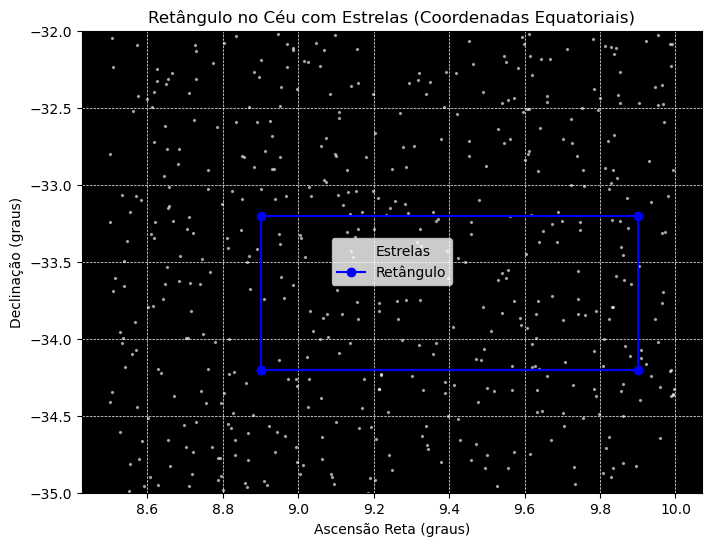

In [ ]:
# Defining the vertices of the rectangle (with the repeated point to close the rectangle)
ra = [8.9, 9.9, 9.9, 8.9, 8.9]  # Right Ascension (with the first point repeated)
dec = [-34.2, -34.2, -33.2, -33.2, -34.2]  # Declination (with the first point repeated)
# The first point is repeated to close the rectangle

# Creating the plot
plt.figure(figsize=(8, 6))

# Adding the background with stars
num_stars = 500  # Number of random stars
star_ra = np.random.uniform(8.5, 10, num_stars)  # Right ascension of the stars
star_dec = np.random.uniform(-35, -32, num_stars)  # Declination of the stars

# Plotting the stars
plt.scatter(star_ra, star_dec, color='white', s=2, alpha=0.5, label="Stars")  # Stars in the background

# Plotting the rectangle with right ascension and declination
plt.plot(ra, dec, marker='o', linestyle='-', color='b', label='Rectangle')

# Adding title and labels
plt.title("Rectangle in the Sky with Stars (Equatorial Coordinates)")
plt.xlabel("Right Ascension (degrees)")
plt.ylabel("Declination (degrees)")

# Setting plot limits for better visualization
plt.ylim(-35, -32)

# Displaying the legend
plt.legend()

# Adding a black background (like the sky)
plt.gca().set_facecolor('black')

# Showing the plot
plt.grid(True, color='white', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
query_CG = "SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_poly_query(ra, dec, ARRAY[8.9, -34.2, 9.9, -34.2, 9.9, -33.2, 8.9, -33.2]) AND extended_class_coadd < 2 "
query_CG

'SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_poly_query(ra, dec, ARRAY[8.9, -34.2, 9.9, -34.2, 9.9, -33.2, 8.9, -33.2]) AND extended_class_coadd < 2 '

In [ ]:
data_CarGalaxy = db.fetchall_df(query_CG) # this can take quite some time

In [ ]:
data_CarGalaxy

coadd_object_id        ra        dec  flags_g  mag_auto_g_dered  \
0           1083233115  8.903303 -34.192051        2         17.879395   
1           1083233647  8.902043 -34.189657        0         25.366838   
2           1083233351  8.905861 -34.186896        0         24.855618   
3           1083233747  8.908578 -34.190648        0         25.208752   
4           1083233505  8.933983 -34.188525        0         25.905296   
...                ...       ...        ...      ...               ...   
17329       1089000368  9.863413 -33.200720        0         26.582672   
17330       1089000230  9.877740 -33.200315        0         20.859892   
17331       1089001337  9.893602 -33.211317        0         25.040827   
17332       1089000789  9.896873 -33.205633        0         25.487259   
17333       1089000559  9.758991 -33.202656        0         28.654034   

       mag_auto_r_dered  mag_auto_i_dered  magerr_auto_g  magerr_auto_r  \
0             16.674522         16.257225       0.000783       0.000364   
1             24.550381         24.269382       0.250888       0.159499   
2             24.986763         25.513369       0.217783       0.320519   
3             24.304001         23.731756       0.224688       0.121410   
4             25.928194         24.846287       0.296523       0.396488   
...                 ...               ...            ...            ...   
17329         24.825117         23.534851       0.864837       0.226918   
17330         20.692837         20.333115       0.006648       0.007543   
17331         24.395540         23.649338       0.267318       0.208549   
17332         24.966320         24.441868       0.237043       0.207459   
17333         24.800764         24.256449       5.946782       0.230205   

       magerr_auto_i  
0           0.000379  
1           0.230430  
2           0.954277  
3           0.137622  
4           0.268696  
...              ...  
17329       0.124092  
17330       0.009411  
17331       0.200091  
17332       0.228496  
17333       0.265447  

[17334 rows x 10 columns]

In [ ]:
data_CarGalaxy.head() # first 5 lines of the data

coadd_object_id        ra        dec  flags_g  mag_auto_g_dered  \
0       1083233115  8.903303 -34.192051        2         17.879395   
1       1083233647  8.902043 -34.189657        0         25.366838   
2       1083233351  8.905861 -34.186896        0         24.855618   
3       1083233747  8.908578 -34.190648        0         25.208752   
4       1083233505  8.933983 -34.188525        0         25.905296   

   mag_auto_r_dered  mag_auto_i_dered  magerr_auto_g  magerr_auto_r  \
0         16.674522         16.257225       0.000783       0.000364   
1         24.550381         24.269382       0.250888       0.159499   
2         24.986763         25.513369       0.217783       0.320519   
3         24.304001         23.731756       0.224688       0.121410   
4         25.928194         24.846287       0.296523       0.396488   

   magerr_auto_i  
0       0.000379  
1       0.230430  
2       0.954277  
3       0.137622  
4       0.268696

### Selection of the Region (Circular)

To select a circular region, simply provide the center coordinates of the selection and a radius (in degrees) as arguments to the `q3c_radial_query()` function. For a diameter of 1 degree, the query would look like this:

```sql
SELECT coadd_object_id, ra, dec, flags_g, mag_auto_g_dered, mag_auto_r_dered,
        mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i,
FROM des_dr2.main
WHERE q3c_radial_query(ra, dec, 9.4, -33.7, 0.5)
AND extended_class_coadd < 2


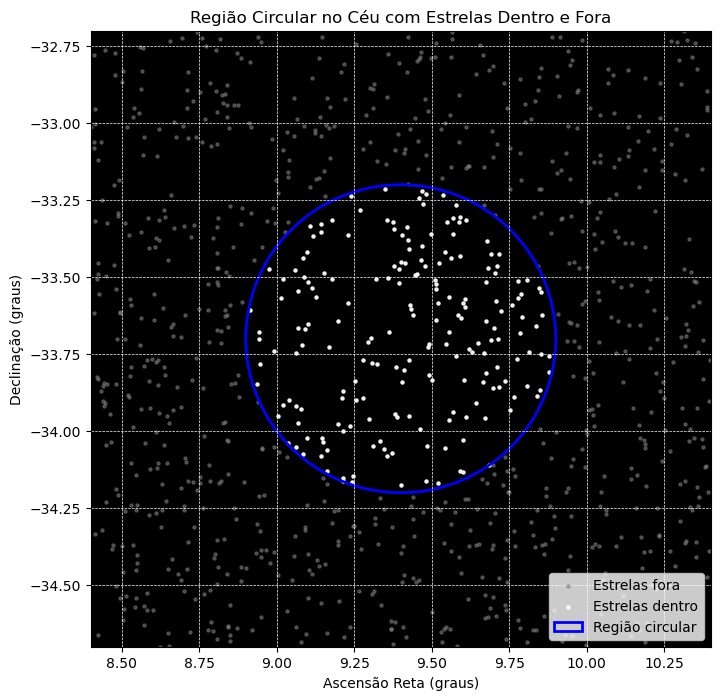

In [ ]:
# Region definitions
ra_center = 9.4  # Right Ascension of the center
dec_center = -33.7  # Declination of the center
radius = 0.5  # Circle radius in degrees

# Generate stars for the entire plane (including outside the circle)
num_stars_total = 1000  # Total number of stars
ra_stars = np.random.uniform(ra_center - 2 * radius, ra_center + 2 * radius, num_stars_total)
dec_stars = np.random.uniform(dec_center - 2 * radius, dec_center + 2 * radius, num_stars_total)

# Identify stars inside the circle
inside_mask = np.sqrt((ra_stars - ra_center) ** 2 + (dec_stars - dec_center) ** 2) <= radius

# Separate stars inside and outside the circle
ra_stars_inside = ra_stars[inside_mask]
dec_stars_inside = dec_stars[inside_mask]
ra_stars_outside = ra_stars[~inside_mask]
dec_stars_outside = dec_stars[~inside_mask]

# Create the plot
plt.figure(figsize=(8, 8))

# Stars outside the circle
plt.scatter(ra_stars_outside, dec_stars_outside, color='gray', s=5, alpha=0.5, label="Stars outside")

# Stars inside the circle
plt.scatter(ra_stars_inside, dec_stars_inside, color='white', s=5, alpha=0.9, label="Stars inside")

# Draw the circular region
circle = plt.Circle((ra_center, dec_center), radius, color='blue', fill=False, linewidth=2, label="Circular region")
plt.gca().add_artist(circle)

# Adjust the plot
plt.title("Circular Region in the Sky with Stars Inside and Outside")
plt.xlabel("Right Ascension (degrees)")
plt.ylabel("Declination (degrees)")
plt.xlim(ra_center - 2 * radius, ra_center + 2 * radius)
plt.ylim(dec_center - 2 * radius, dec_center + 2 * radius)

# Add black background and grid
plt.gca().set_facecolor('black')
plt.grid(color='white', linestyle='--', linewidth=0.5)

# Display legend
plt.legend()

# Show the plot
plt.show()



In [ ]:
query_circle = "SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_radial_query(ra, dec, 9.4, -33.7, 0.5) AND extended_class_coadd < 2 "
query_circle

'SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_radial_query(ra, dec, 9.4, -33.7, 0.5) AND extended_class_coadd < 2 '

In [ ]:
Dados_Cartwheel_Circle = db.fetchall_df(query_circle)

In [ ]:
Dados_Cartwheel_Circle

coadd_object_id        ra        dec  flags_g  mag_auto_g_dered  \
0           1083232979  9.245211 -34.183172        0         23.839706   
1           1083232625  9.250448 -34.179208        0         27.973959   
2           1083232493  9.234036 -34.177755        0         24.859114   
3           1083232001  9.224144 -34.172271        0         24.293543   
4           1083231852  9.224597 -34.170778        0         25.451180   
...                ...       ...        ...      ...               ...   
16192       1089011569  9.760322 -33.317063        0         25.390100   
16193       1089010989  9.753170 -33.311335        0         26.228264   
16194       1089010613  9.762326 -33.307435        0         25.058712   
16195       1089011445  9.782738 -33.315795        0         25.039434   
16196       1089009375  9.753375 -33.296805        2         21.080318   

       mag_auto_r_dered  mag_auto_i_dered  magerr_auto_g  magerr_auto_r  \
0             23.619831         23.437641       0.077145       0.082664   
1             24.978254         25.099403       3.571857       0.298401   
2             24.506134         24.411049       0.128408       0.121752   
3             22.927771         21.489794       0.129328       0.050474   
4             25.340595         24.931129       0.200842       0.237049   
...                 ...               ...            ...            ...   
16192         24.974436         24.463120       0.399654       0.376492   
16193         25.521381         26.119808       0.483894       0.352735   
16194         23.656656         21.949173       0.287294       0.110276   
16195         24.645456         24.586361       0.187337       0.180060   
16196         19.768915         19.008812       0.010864       0.004774   

       magerr_auto_i  
0           0.124732  
1           0.595661  
2           0.199331  
3           0.023239  
4           0.293737  
...              ...  
16192       0.451997  
16193       1.189051  
16194       0.041389  
16195       0.327748  
16196       0.004335  

[16197 rows x 10 columns]

In [ ]:
Dados_Cartwheel_Circle.head() # just first 5 lines

coadd_object_id        ra        dec  flags_g  mag_auto_g_dered  \
0       1083232979  9.245211 -34.183172        0         23.839706   
1       1083232625  9.250448 -34.179208        0         27.973959   
2       1083232493  9.234036 -34.177755        0         24.859114   
3       1083232001  9.224144 -34.172271        0         24.293543   
4       1083231852  9.224597 -34.170778        0         25.451180   

   mag_auto_r_dered  mag_auto_i_dered  magerr_auto_g  magerr_auto_r  \
0         23.619831         23.437641       0.077145       0.082664   
1         24.978254         25.099403       3.571857       0.298401   
2         24.506134         24.411049       0.128408       0.121752   
3         22.927771         21.489794       0.129328       0.050474   
4         25.340595         24.931129       0.200842       0.237049   

   magerr_auto_i  
0       0.124732  
1       0.595661  
2       0.199331  
3       0.023239  
4       0.293737

## End of Data Collection
This concludes item 2.

**2. Coleta de Dados:**

Use as coordenadas (declinação e ascensão reta) da região escolhida.
Acesse o banco de data do DES através da infraestrutura do LIneA using a
biblioteca dblinea. Lembre-se de que a biblioteca funciona apenas dentro da
infraestrutura do LIneA.
Colete os data da região em torno do objeto selecionado.

## Data Storage

According to item 3,

**3. Armazenamento dos Dados:**
    Salve os data coletados em um arquivo CSV.

We shall now salve our data on a CSV file.

In [ ]:
data_CarGalaxy.to_csv('Dados_CartwheelGalaxyRectangle.csv', index=False)

In [ ]:
Dados_Cartwheel_Circle.to_csv('Dados_CartwheelGalaxyCircle.csv', index=False)

Let's now proceed to the next step in another notebook, where we will read these generated `.csv` files and plot certain graphs for better visualization of the data analysis.
